## Programming Exercise 3 - Multi-class Classification and Neural Networks

In [73]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# load MATLAB files
from scipy.io import loadmat
from scipy.optimize import minimize

#from sklearn.neural_network import MLPClassifier

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

#### Load MATLAB datafiles

In [74]:
data = loadmat('data/ex3data1.mat')
data.keys()

dict_keys(['y', '__globals__', '__version__', 'X', '__header__'])

In [75]:
y = data['y']
# Add intercept
X = np.c_[np.ones((data['X'].shape[0],1)), data['X']]

print('X:',X.shape, '(with intercept)')
print('y:',y.shape)

X: (5000, 401) (with intercept)
y: (5000, 1)


In [76]:
weights = loadmat('data/ex3weights.mat')
weights.keys()

dict_keys(['Theta2', '__globals__', '__version__', 'Theta1', '__header__'])

In [77]:
theta1, theta2 = weights['Theta1'], weights['Theta2']

array([8], dtype=uint8)

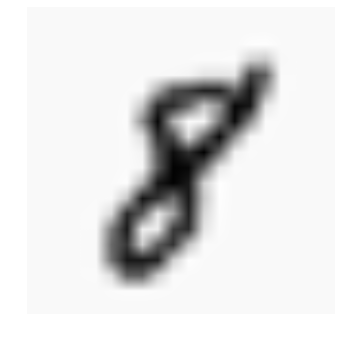

In [78]:
n = 4000
plt.imshow(X[n,1:].reshape(20,20).T)
plt.axis('off')
y[n]

### Multiclass Classification

#### Logistic regression hypothesis
### $$ h_{\theta}(x) = g(\theta^{T}x)$$
### $$ g(z)=\frac{1}{1+e^{−z}} $$

In [79]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

#### Regularized Cost Function 
### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
#### Vectorized Cost Function
### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [80]:
def lrcostFunctionReg(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    return(J)

#### One-vs-all Classification

In [81]:
def oneVsAll(features, classes, n_labels, reg):
    initial_theta = np.zeros((X.shape[1],1))  # 401x1
        
    #all_theta = None
    for c in np.arange(1, 2):
        res = minimize(lrcostFunctionReg, initial_theta, args=(reg, features, (classes == c)*1), method=None, jac=None, options={'maxiter':3000})
        all_theta = np.r_[all_theta, res.x]

In [91]:
lrcostFunctionReg(np.zeros((X.shape[1],1)), 1, X, (y==11).ravel()*1)

array([ 0.69314718])

In [ ]:
minimize(lrcostFunctionReg, np.zeros((X.shape[1],1)), args=(1, X, y == 1), method=None, jac=None, options={'maxiter':50})

In [ ]:
#for c = 1:num_labels
#    theta = fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), initial_theta, options);
 
#% all_theta should be num_labels (10) by 401
#    all_theta(c,:) = theta;

In [83]:
def predictOneVsAll(all_theta, features):
    probs = sigmoid(X.dot(all_theta.T))
    
    return(np.argmax(probs, axis=1)+1)

#### One-vs-all Prediction

In [84]:
pred = predictOneVsAll(all_theta, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

NameError: name 'all_theta' is not defined

### Neural Networks

In [65]:
def predict(theta_1, theta_2, features):
    z2 = theta_1.dot(features.T)
    a2 = np.c_[np.ones((data['X'].shape[0],1)), sigmoid(z2).T]
    
    z3 = a2.dot(theta_2.T)
    a3 = sigmoid(z3)
    
    # Adding one because Python uses zero based indexing for the 10 columns (0-9),
    # while the 10 classes are numbered from 1 to 10.
    return(np.argmax(a3, axis=1)+1) 

In [72]:
pred = predict(theta1, theta2, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 97.52 %
